
**<center>FUZZY C MEANS CLUSTERING</center>**
**Aim:**

To Implementation of Fuzzy C-Means Clustering Algorithm on the given datasets

**Description:**

Fuzzy Clustering is a type of clustering algorithm in machine learning that allows a data point to belong to more than one cluster with different degrees of membership. Unlike traditional clustering algorithms, such as k-means or hierarchical clustering, which assign each data point to a single cluster, fuzzy clustering assigns a membership degree between 0 and 1 for each data point for each cluster.

The steps to perform the algorithm are:


> **Step 1:** Initialize the data points into the desired number of clusters randomly.

> **Step 2:** Find out the centroid.

> **Step 3:** Find out the distance of each point from the centroid.

> **Step 4:** Updating membership values.

> **Step 5:** Repeat the steps(2-4) until the constant values are obtained for the membership values or the difference is less than the tolerance value (a small value up to which the difference in values of two consequent updations is accepted).

> **Step 6:** Defuzzify the obtained membership values.



**CODE:**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
from scipy.stats import pearsonr
n_samples=5000

**Load the given dataset**

In [ ]:
df=pd.read_csv("wine_dataset.csv")
df


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


**Conduct the pre-processing steps, Remove the target variable, if available in the dataset**

In [ ]:
from sklearn.model_selection  import train_test_split
x=df.iloc[:,1:11]
y=df.quality
x_train,y_train,x_test,y_test = train_test_split(x,y,test_size=0.25,random_state=105,shuffle=True)

**Plot the datapoints using scatter plots.**

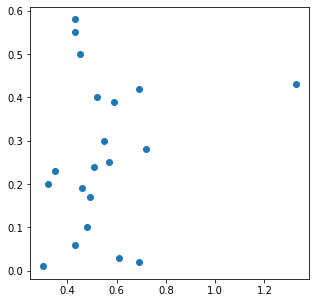

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.scatter(x_train.iloc[:,0].head(20),y_train.iloc[:,1].head(20),alpha=1)
plt.show()

**Apply fuzzy C-means clustering approach and cluster the datapoints into N number of clusters. Determine the optimal number of clusters.**

In [ ]:
from fcmeans import FCM

In [ ]:
x=np.array(x_train)
fcm= FCM(n_clusters=3)
fcm.fit(x)
#outputs
fcm_centers = fcm.centers
fcm_labels  = fcm.predict(x)
fcm_labels
fcm.partition_coefficient

0.2563033633231873

**Print and plot the cluster centroids and cluster labels**

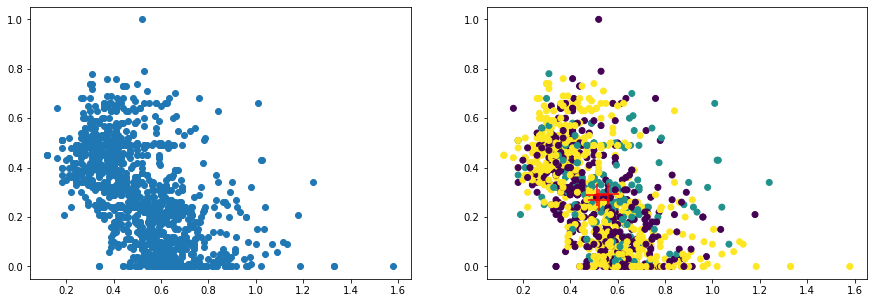

In [ ]:
f,axes = plt.subplots(1,2,figsize=(15,5))
axes[0].scatter(x[:,0],x[:,1],alpha=1)
axes[1].scatter(x[:,0],x[:,1],c=fcm_labels,alpha=1)
axes[1].scatter(fcm_centers[:,0],fcm_centers[:,1],marker = "+",s=500,c='r')

**Repeat the algorithm for ‘n’ number of clusters**

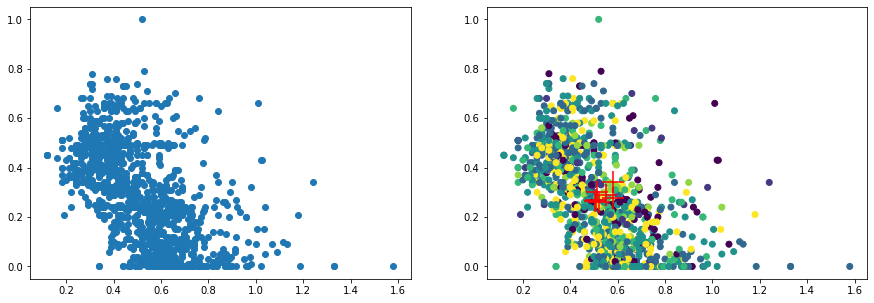

In [ ]:
x=np.array(x_train)
fcm1= FCM(n_clusters=7)
fcm1.fit(x)
#outputs
fcm1_centers = fcm1.centers
fcm1_labels  = fcm1.predict(x)
#plot results
f,axes = plt.subplots(1,2,figsize=(15,5))
axes[0].scatter(x[:,0],x[:,1],alpha=1)
axes[1].scatter(x[:,0],x[:,1],c=fcm1_labels,alpha=1)
axes[1].scatter(fcm1_centers[:,0],fcm1_centers[:,1],marker = "+",s=500,c='r')

**Measure the performance using partition co-efficient and classification entropy metrics.**

In [ ]:
ft=[]
for i in  range(1,20):
    fcm= FCM(n_clusters=i)
    fcm.fit(x)
    m1=fcm.partition_coefficient
    m2=fcm.partition_entropy_coefficient
    ft.append(["N="+str(i),m1,m2])

ftdn=pd.DataFrame(ft,columns=['N_value','partition_coefficient','partition_entropy_coefficient'])
ftdn

,N_value,partition_coefficient,partition_entropy_coefficient
0,N=1,1.000000,-0.000000
1,N=2,0.423985,0.184639
2,N=3,0.256303,0.201841
3,N=4,0.180603,0.190969
4,N=5,0.135372,0.183232
5,N=6,0.104988,0.179453
6,N=7,0.086779,0.167024
7,N=8,0.072101,0.161552
8,N=9,0.061167,0.156260
9,N=10,0.053451,0.148835


**Print and plot the cluster centroids and cluster labels for ‘n’ number of clusters**

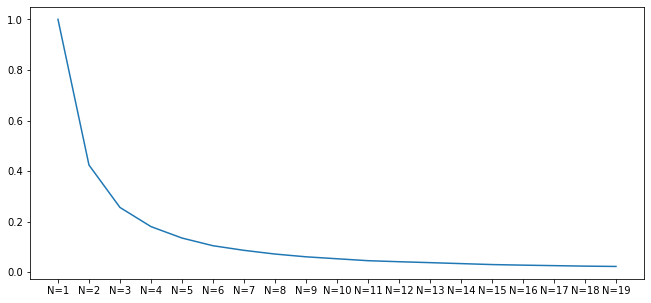

In [ ]:
plt.figure(figsize=(11,5))
plt.plot(ftdn.iloc[:,0],ftdn.iloc[:,1])
plt.show()

**Result:**

Thus Implementation of Fuzzy C-Means Clustering Algorithm has been successfully implemented on the given dataset